## 2021/22 Climate Change Belief Analysis Predict Solution

<img src="https://1qa2mv1tvhvk1t1uyv1mvwyx1dmd-wpengine.netdna-ssl.com/files/2014/01/Twitter-350.jpg"
     alt="Learn good habits to avoid modeling debt"
     style="float: center; padding-bottom=0.5em"
     width=700px
     height=500px/>

### Team 6 

- Floyd Skakane
- Lehlogonolo Jesica Teffo
- Muhammed Irfaan Ahmed
- Mulalo Malange
- Vuyisile Ngobeni


### Supervisor
James Combrink

### Introduction

Many companies are built around lessening one’s environmental impact or carbon footprint.They offer  products and services that are environmentally friendly and sustainable, in line with their values  and ideals.They would like to determine how people perceive climate change and whether or not they believe  it is a real threat.This would add to their market research efforts in gauging how their product/service may be received.

### Problem statement

We are tasked to create a Machine Learning model that is able to classify whether or not a person believes in climate change,
based on their novel tweet data.Providing an accurate and robust solution to this task gives companies access to a broad base
of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing
future marketing strategies.

### Aim 
To predict an individual’s belief in climate change based on historical tweet data.

### Data description

- The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of   Waterloo.
- The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. 
- In total, 43943 tweets were collected. 
- Each tweet is labelled as one of the following classes:

Class description:

- 2 News: the tweet links to factual news about climate change
- 1 Pro: the tweet supports the belief of man-made climate change
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Anti: the tweet does not believe in man-made climate change
- Columns: index, sentiment, messages
- sentiment: Sentiment of tweet i.e 0, 1, etc
- message: Tweet body
- tweetid: Twitter unique id


<a id="cont"></a>

### Table of Contents

1. Importing Packages</a>

2. Loading Data</a>

3. Data Preprocessing</a>

4. Exploratory Data Analysis (EDA)</a>

5. Comet Experimentation

6. Data Cleaning</a>

7. Feature Engineering</a>

8. Modelling
9. Model Performance
10. Balancing Data
11. Model Performance with balanced data
12. Model Explanation/Evaluation
13. Submission
14. Conculsion</a>

### 1. Importing Packages

In [ ]:
pip install comet_ml

     |████████████████████████████████| 308 kB 29.6 MB/s 
     |████████████████████████████████| 546 kB 49.8 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=a3e17e3b3370abf2a3649f2850f175ea84baa06d7d4188d369cc903f717315fe
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [ ]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="tUlD7sThKB1ruPMrpsAUJ5HlO",
    project_name="general",
    workspace="mirfaana",
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mirfaana/general/48a044ed2a6b436cbf490a960d1df232



In [ ]:
!pip install contractions

     |████████████████████████████████| 321 kB 32.0 MB/s 
     |████████████████████████████████| 284 kB 62.2 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85447 sha256=76d4b366caeddcf76e75357f3a0f0b483795a2a4d0f290f85600200a589c88cc
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.stem.porter import *
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import contractions
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
# ML Libraries
import scipy.sparse
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
from sklearn.utils import resample
import os

from wordcloud import WordCloud
stop_words = set(stopwords.words('english'))

# Setting global constants to ensure notebook results are reproducible
import matplotlib.style as style 
sns.set(font_scale=1.5)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 20)
sns.set(rc={'figure.figsize':(12,8)}) ##remove this
#style.use('seaborn-pastel')
#style.use('seaborn-poster')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### 2. Loading Data

The train and test data set will be loaded from the Github Repository:

In [ ]:
# Loading train and test data from csv files
df_train = pd.read_csv("https://raw.githubusercontent.com/MIrfaanA/classification-predict-streamlit-template/master/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/MIrfaanA/classification-predict-streamlit-template/master/test_with_no_labels")



### 3. Basic Data Analysis

In this section we will look at the data types and gain some basic info on the data. This will include looking at the data set and checking for missing values amongst other things

**Raw Data**

Lets have a look at the raw data to see what the data set contains, before preprocessing

**Train Data set**





*   **Data types in train set**



In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The 'sentiment' and 'tweetid' columns are integer types while the message column is an object type. Note that we will not need to do any analysis on the 'tweetid' column as this serves to identify each unique tweet 



*   **Viewing the train data set**





In [ ]:
#Viewing the train dataset
display(df_train.head())
print(df_train.shape)


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


(15819, 3)


The train data set consists of 15819 rows and 3 columns of which the sentiment is the value we are modeling for.

*   **Unique Values in Sentiments**




In [ ]:
#Check for all the unique values in sentiments
df_train['sentiment'].unique()

array([ 1,  2,  0, -1])

There are 4 unique sentiment values. They will be described below:



*   [2] News: the tweet links to factual news about climate change
*   [1] Pro: the tweet supports the belief of man-made climate change
*   [0] Neutral: the tweet neither supports nor refutes the belief of man-made climate change
*   [-1] Anti: the tweet does not believe in man-made climate change





*   **Null Values**



In [ ]:
#Empty rows in data setup
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

There are no null values in any of the columns. We do not need to impute any data.

**Test Data Set**


In [ ]:
#Viewing the test dataset
display(df_test.head())
print(df_test.shape)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


(10546, 2)


The test data set has 10546 rows with the message and tweetid columns that will be used to predict the sentiment. This will then be submitted on kaggle. 

###4. Exploratory Data Analysis

An indepth analysis and visualisation of the data set will be performed in the following section

**Seperate tweets according to class**

The train data will be seperated according to the sentiment. This will come in handy when creating various graphs.

In [ ]:
# seperate tweets according to sentiment
news = df_train[df_train['sentiment']==2]
pro = df_train[df_train['sentiment']==1]
neutral = df_train[df_train['sentiment']==0]
anti = df_train[df_train['sentiment']==-1]

In [ ]:
# view news dataframe
news.head()

,sentiment,message,tweetid
2,2,RT @RawStory: Researchers say we have three ye...,698562
12,2,RT @tveitdal: We only have a 5 percent chance ...,454673
14,2,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092
26,2,Bangladesh confronting climate change head on ...,365291
32,2,RT @latimes: Atmospheric rivers fueled by clim...,143471


In [ ]:
# view pro climate change dataframe
pro.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577


In [ ]:
# view neutral dataframe
neutral.head()

,sentiment,message,tweetid
19,0,Calum: *tweets abt reunitingish w the cast*\n-...,547924
22,0,"we also met this guy, he let us in on some tru...",67545
30,0,@Jnp_Ftw are these the same scientists that de...,365051
39,0,We’ ve dealt with simple issues like climate c...,403368
43,0,RT @andrewsharp: Win probability is bullshit m...,326916


In [ ]:
# view anti climate change dataframe
anti.head()

,sentiment,message,tweetid
28,-1,Sally Kohn’s latest evidence of climate change...,355491
46,-1,@realDonaldTrump Carbon Tax is a Globalist ide...,61141
48,-1,RT @SteveSGoddard: We had winds close to 100 M...,719523
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining ...,911385
57,-1,RT @Dawn2334Dawn: This is ONE of Arnold Schwar...,768263


**Number of Tweets**




The number of tweets per  sentiment class will be determined and visualised using a bar graph and pie chart. 





*   **Bar Graph on number of tweets per sentiment class**




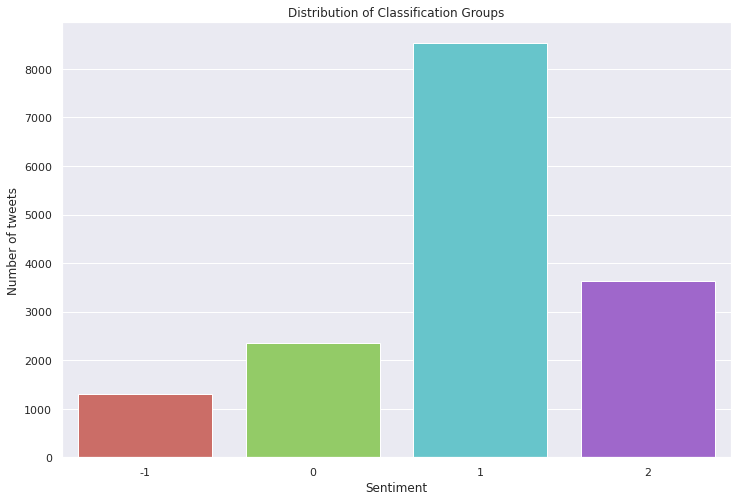

<Figure size 864x576 with 0 Axes>

In [ ]:
# Plot bar graph
graph = sns.countplot(x = 'sentiment',data = df_train,palette='hls')

# Create title and  show plot
plt.title('Distribution of Classification Groups')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show(graph)


# Save figure
plt.savefig('tweet_distribution.png')

*   ***Pie Chart on Percentage of tweets per sentiment class***




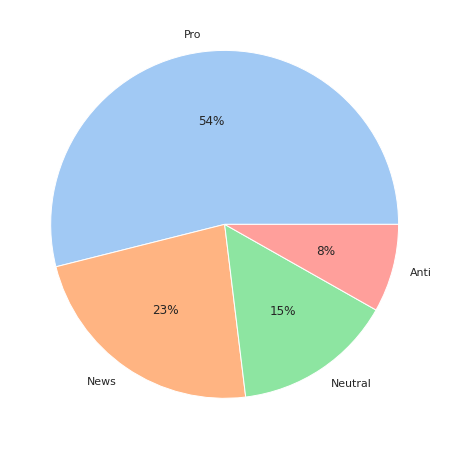

<Figure size 864x576 with 0 Axes>

In [ ]:
# Define data
data = df_train['sentiment'].value_counts()
labels = ['Pro', 'News', 'Neutral', 'Anti']

# Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# Create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Save figure
plt.savefig('pie_chart.png')

Note that the tweet distribution is uneven.This means that there will be an imbalance in data and results may be biased towards a pro climate sentiment. It may be important to resample the data before training. Most tweets are pro climate change, followed by news tweets. Note that although it is refreshing to know that most tweets are pro climate it does not say much. We need to compare it to previous years to see if more people are pro or anti climate change. For example previous years could have 60% pro climate change and now it is 54% this would indicate a drop in the belief that humans are causing climate change. Keep in mind that these tweets are not representative of the whole human population so it would be better to use a larger data set that includes people from various countries.

**Length of Tweets per Sentiment class**


*   **Tweet length distribution (Bar graphs)**



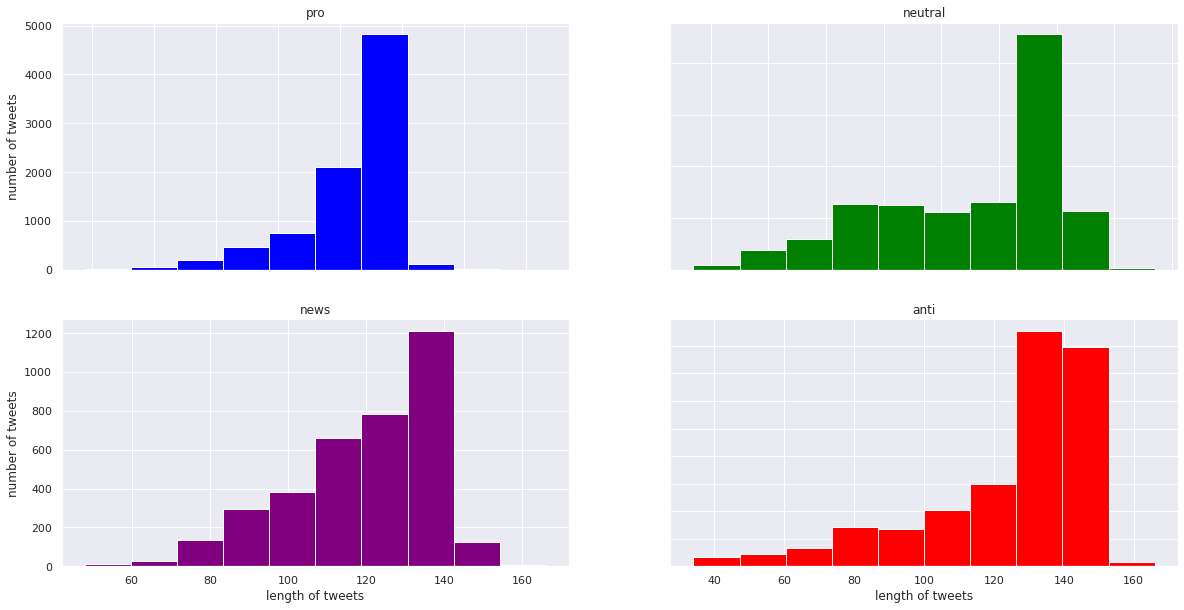

In [ ]:

# Create bar graphs of tweet length per sentiment class

fig, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0, 0].hist(pro.message.str.len(),bins=10,label='pro',color='blue')
axs[0, 0].set_title('pro')

axs[1, 0].set_title('news')
axs[1, 0].hist(news.message.str.len(),bins=10,label='news',color='purple')

axs[0, 1].set_title('neutral')
axs[0, 1].hist(neutral.message.str.len(),bins=10,label='neutral',color='green')

axs[1, 1].set_title('anti')
axs[1, 1].hist(anti.message.str.len(),bins=10,label='anti',color='red')

for ax in axs.flat:
    ax.set(xlabel='length of tweets', ylabel='number of tweets')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Save figure
plt.savefig('Bargraphs_tweet_length.png')

*   **Tweet length distribution (Box Plots)**



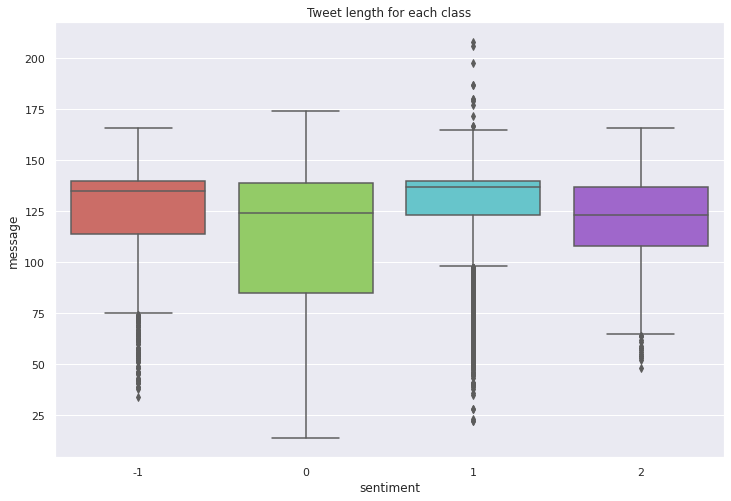

In [ ]:
# Plot the distribution of the length tweets for each class using a box plot
sns.boxplot(x=df_train['sentiment'], y=df_train['message'].str.len(), data=df_train, palette=("hls"))
plt.title('Tweet length for each class')
plt.show()

While all sentiment classes have most of their tweet lengths between 130 and 140 characters. We see that the anti climate change class has majority of its tweets between 130 to 150 characters. This could suggest that the anti climate tweeters are more vocal. The neutral and news sentiment class has tweet lengths that are more varried compared to the other classes


**Word Clouds**


The Word clouds that will be generated will first be visualised based on the tweets as a whole and then per sentiment class. Note that this has been done before any cleaning. The reason for this is that firstly we may get some insights based on the words that we may think unecessary. Secondly, it does help us visualise and see what we may need to remove. 



*   **Word Cloud based on all tweets**




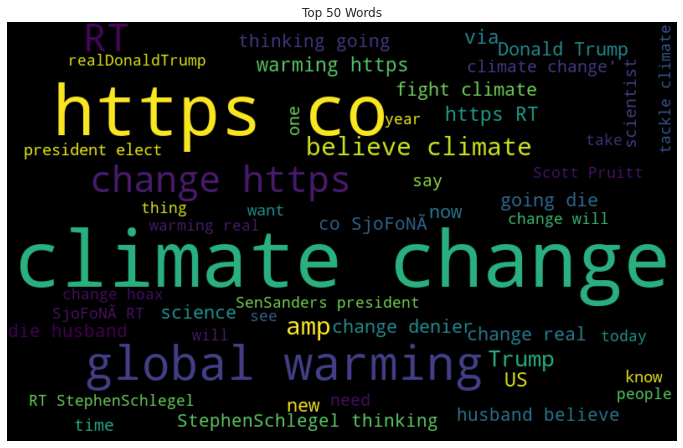

<Figure size 864x576 with 0 Axes>

In [ ]:
# Create list of words to be used in wordlcloud
all_words = ''.join([word for word in df_train['message']])

# Generate wordcloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, max_words=50).generate(all_words)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 50 Words')

# Display wordcloud
plt.show()

# Save figure as png file
plt.savefig('main_word_cloud.png')


The words 'climate change', 'global warming', 'https' and 'RT' are the words one notices almost immediately when having a glimpse at all the wordclouds. These words would therefore have a low impact on the prediction, therefore they can be removed to reduce computing time and resources when training the model.

Although these words may have a low impact on the model they do give us some insights. For one, 'https' signifies that a lot of links are used. Donald Trump seems like a famous figure in the climate change issue. This could also indicate that a lot of tweets originate from the United States, since words like 'president elect' and 'SenSanders' are used.



*   **Word clouds per seniment class**




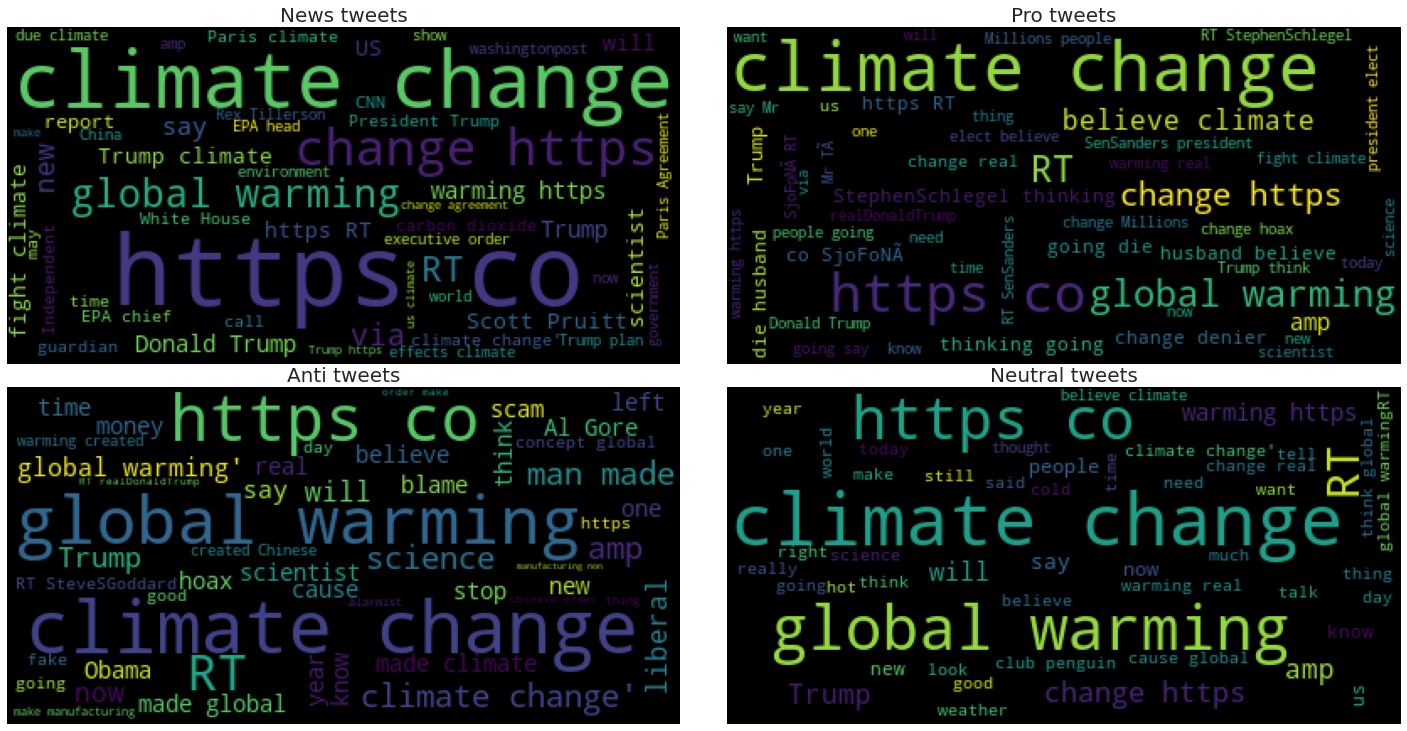

In [ ]:
# Create list of words based on each sentiment
news_wc = ''.join([word for word in df_train[df_train['sentiment'] == 2]['message']])
pro_wc = ''.join([word for word in df_train[df_train['sentiment'] == 1]['message']])
neutral_wc = ''.join([word for word in df_train[df_train['sentiment'] == 0]['message']])
anti_wc = ''.join([word for word in df_train[df_train['sentiment'] == -1]['message']])

# Create wordclouds for each sentiment
news_wordcloud = WordCloud(max_words=50).generate(news_wc)
pro_wordcloud = WordCloud( max_words=50).generate(pro_wc)
anti_wordcloud = WordCloud(max_words=50).generate(anti_wc)
neutral_wordcloud = WordCloud(max_words=50).generate(neutral_wc)

# Plot wordclouds in grid
fig, axs = plt.subplots(2, 2, figsize = (20, 10))
fig.tight_layout(pad = 0)
axs[0, 0].imshow(news_wordcloud)
axs[0, 0].set_title('News tweets', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pro_wordcloud)
axs[0, 1].set_title('Pro tweets', fontsize = 20)
axs[0, 1].axis('off')


axs[1, 0].imshow(anti_wordcloud)
axs[1, 0].set_title('Anti tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral_wordcloud)
axs[1, 1].set_title('Neutral tweets', fontsize = 20)
axs[1, 1].axis('off')

# Save figure as png file
plt.savefig('multiple_word_cloud.png')


-**News Tweets**

We notice that the 'https' words are larger in the News cloud, indicating that news tweets contain a lot of links in them. 'Trump' also appears often here.

**-Pro Tweets**

Pro tweets have a lot of words related to Trump. Generally this could indicate their criticism for Trumps Anti Climate sentiments





**-Anti Tweets**

Anti Tweets mention Al Gore and Obama. Al-Gore and Obama are both known to favour the sentiment that climate change is human caused. Their names mentioned in anti climate tweets indicate a lot of criticism from anti-climate tweeters. Another thing to keep in mind when looking at this word cloud is the fact that words like 'fake','scam' and 'hoax'  are also used. These words are common amongst people that believe in conspiracy theories.

**-Neutral Tweets**

Amongst the Neutral tweets we see the common words found in the other classes but also words related to temperature and weather, such as 'hot' or 'cold'. 




**Hashtags**


Hashtags are a handy way of grouping and categorising tweets, and they help people follow topics in which they're interested. Anyone searching for a specific topic can find relevant tweets immediately rather than having to scroll through their Twitter feed. Analysing hashtags are therefore important for data analysis

In [ ]:
# Separate joined words
def camel_case_split(identifier):
    matches = re.finditer(
        r'.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)',
        identifier
    )
    return " ".join([m.group(0) for m in matches])
# Hashtags extractor
def extract_hashtags(message):
  hash_tags = re.findall(r'(?:^|\s)#(\w+)', message)
  return [camel_case_split(tag) for tag in hash_tags]


In [ ]:
### this will show hashtags for all tweets
# Extracting Hashtags from tweets
df_train['hashtags'] = df_train['message'].apply(extract_hashtags)

# Finding Number of Characters per Tweet
df_train["num_chars"] = df_train["message"].apply(lambda x: len(str(x)))

In [ ]:
# Hashtags according to sentiments
hash_anti = df_train[df_train['sentiment'] == -1]['hashtags']
hash_neutral = df_train[df_train['sentiment'] == 0]['hashtags']
hash_pro = df_train[df_train['sentiment'] == 1]['hashtags']
hash_news = df_train[df_train['sentiment'] == 2]['hashtags']

# Finding count for hashtags
hash_anti = sum(hash_anti,[])
hash_neutral = sum(hash_neutral,[])
hash_pro = sum(hash_pro, [])
hash_news = sum(hash_news,[])



*   **Negative Hashtags**



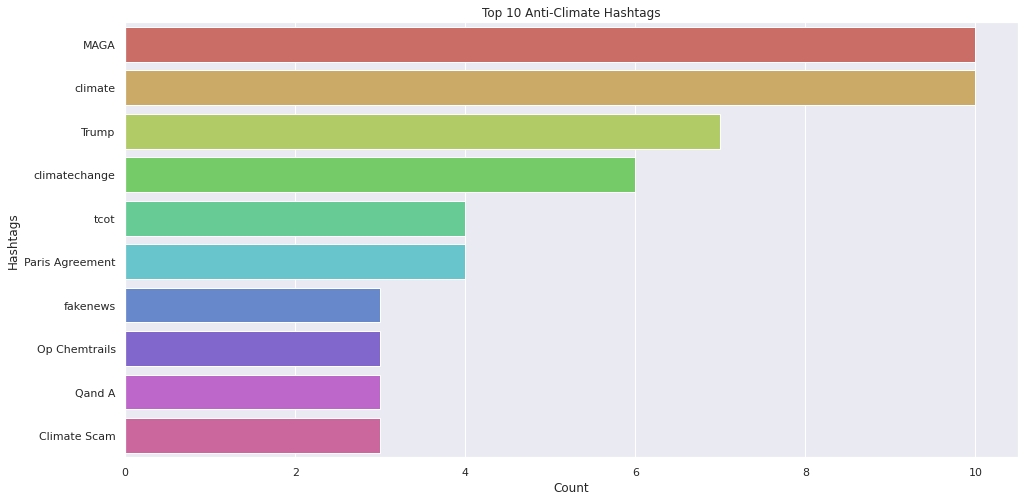

<Figure size 864x576 with 0 Axes>

In [ ]:
# Graph for Anti Climate Sentiment
a = nltk.FreqDist(hash_anti)
d = pd.DataFrame({'Negative': list(a.keys()),
                  'Count': list(a.values())})
    
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,8))
ax = sns.barplot(data=d, y= "Negative", x = "Count",palette="hls")
ax.set(ylabel = 'Hashtags')
plt.title("Top 10 Anti-Climate Hashtags")
plt.show()

# Save figure
plt.savefig('Hashtag_anti.png')

Besides the 'climate' hashtag, 'MAGA' is the most common hastag amongst anti climate tweeters. MAGA stands for "Make America Great Again". This was a widely used slogan during former President of the United States, Donald Trump. Trump was the presedential candidate for conservative Republican party. The hashtags in the anti climate change sentiment also allude to common words used amongs conspiracy theorists. These words include 'fake news', 'climate scam', 'chemtrails'. The 'Qand A' hashtag refers to 'QAnon' which is an American far-right political conspiracy theory and movement centered on false claims made by an anonymous individual or individuals, known by the name "Q". Qanon has a cult like status.

The hashtags in the anti climate sentiment therefore suggest that people who believe in conspiracy theories also tend to be anti climate change. These members are also likely to be pro Trump.

*   **Pro Hashtags**




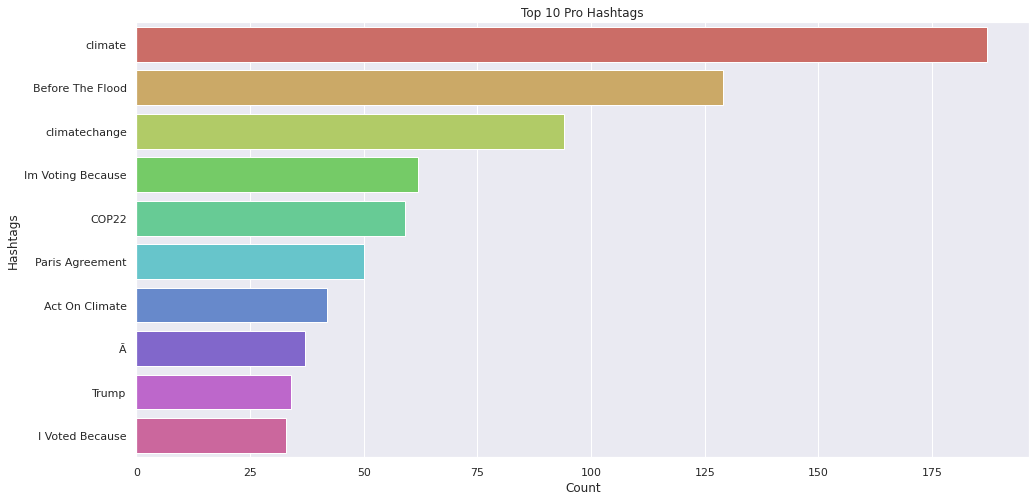

<Figure size 864x576 with 0 Axes>

In [ ]:
# Graph for Pro climate Sentiment
a = nltk.FreqDist(hash_pro)
d = pd.DataFrame({'Positive': list(a.keys()),
                  'Count': list(a.values())})
    
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,8))
ax = sns.barplot(data=d, y= "Positive", x = "Count",palette="hls")
ax.set(ylabel = 'Hashtags')
plt.title("Top 10 Pro Hashtags")
plt.show()

# Save figure
plt.savefig('Hashtag_pro.png')


The hashtags in this sentiment class generally refers to events that deal with combatting climate change.'Before the flood' refers to a popular Pro climate change movie. The Paris Agreement is treaty between states to combat climate change.The twenty-second session of the Conference of the Parties (COP 22)  refers to  The 2016 United Nations Climate Change Conference which was an international meeting of political leaders and activists to discuss environmental issues. 



*   **Neutral Hashtags**




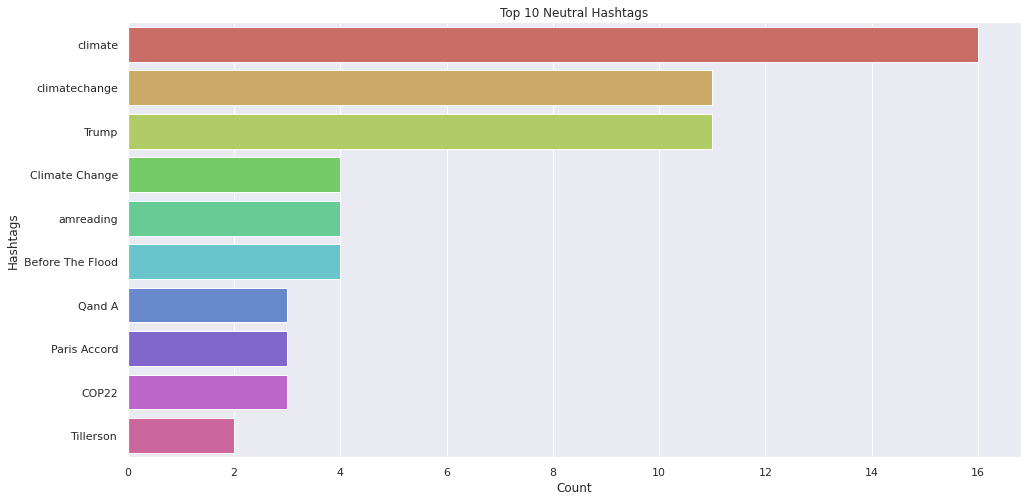

<Figure size 864x576 with 0 Axes>

In [ ]:
# Graph for Neutral Sentiment
a = nltk.FreqDist(hash_neutral)
d = pd.DataFrame({'Neutral': list(a.keys()),
                  'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,8))
ax = sns.barplot(data=d, y= "Neutral", x = "Count",palette="hls")
ax.set(ylabel = 'Hashtags')
plt.title("Top 10 Neutral Hashtags")
plt.show()

# Save figure
plt.savefig('Hash_tag_Neutral.png')

The neutral hashtags have a mix of the words from both the pro and anti climate sentiment classes. However, the hashtags mentioned the most are words relating to climate change and Trump. Note that the hashtags in the neutral sentiment are not that many compared to the pro and negative classes. A feature for a neutral tweet could be the fact that it has less hashtags.

*   **News Hashtags**




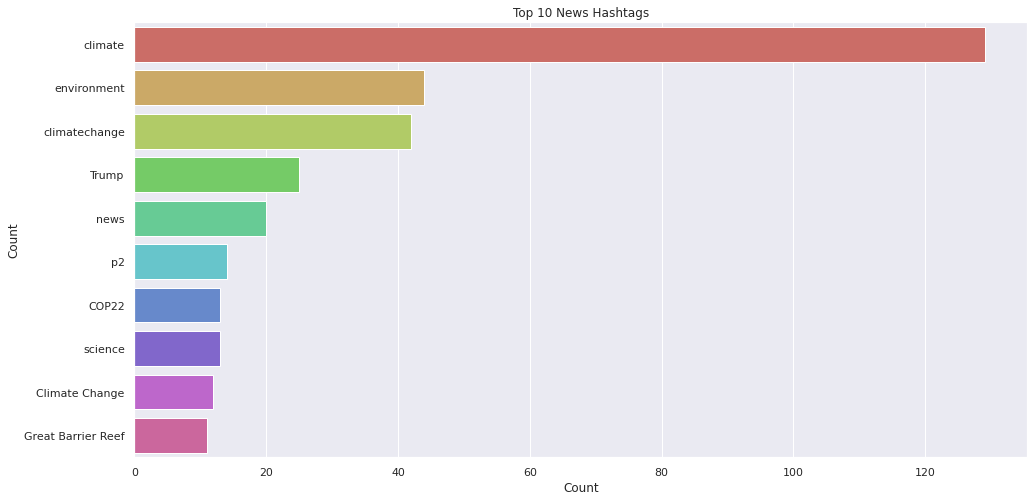

<Figure size 864x576 with 0 Axes>

In [ ]:
# Graph for News Sentiment
a = nltk.FreqDist(hash_news)
d = pd.DataFrame({'News': list(a.keys()),
                  'Count': list(a.values())})
     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
ax = sns.barplot(data=d, x= "Count", y = "News",palette="hls")
ax.set(ylabel = 'Count')
plt.title("Top 10 News Hashtags")
plt.show()

# Save figure
plt.savefig('Hashtag_news.png')

Its noteworthy that 'news' is amongst the top hashtags. This was not found in the previous sentiment hashtags. This means finding the hashtag news is a good factor in predicting if a tweet is of the news type.

##### 5. Comet Experimentation


In this section we explored some basic models for use in Comet and  for  how to experiment, using Comet. Note that these are not our final models.

In [ ]:
# Generate and fit Tfidf Vectorizer.
vect=TfidfVectorizer(lowercase=True,stop_words='english',max_features=30000,ngram_range=(1,2),analyzer='word')
X_tfidf=vect.fit_transform(df_train['message'])

In [ ]:
# Convert vectorized value into array
X=X_tfidf.toarray()

In [ ]:
#Fit test values from test data
X_tfidf_test=vect.transform(df_test['message'])

In [ ]:
# Convert values to array
X_tfidf_test=X_tfidf_test.toarray()

In [ ]:
# Get labels from data frame
y=df_train['sentiment']

In [ ]:
# Perfrom train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10
                                                    
                                                    , random_state=27)

In [ ]:
# Generate Logistic regression and Linear SVC model
#logreg = LogisticRegression(multi_class='ovr')
lsv= LinearSVC()

In [ ]:
#logreg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
# Fit linear SVC model
lsv.fit(X_train, y_train)

LinearSVC()

In [ ]:
# Predict using model
#y_pred_test = logreg.predict(X_test)
y_pred_test = lsv.predict(X_test)

In [ ]:
# fucntions for scoring model

f1=f1_score(y_test,y_pred_test,average='weighted')
precision=precision_score(y_test,y_pred_test,average='weighted')
recall=recall_score(y_test,y_pred_test,average='weighted')
accuracy=accuracy_score(y_test,y_pred_test)

In [ ]:
# create dictionary for Comet
params={'random_state':27,
        'model_type':'linear svc',
        'max_features':30000,
        'ngram_range':(1,2),
        'vectorizor':'tfidf'}
metrics={'Accuracy':accuracy,
         'f1':f1,
         'recall':recall,
         'precision':precision,}


In [ ]:
#log parameters and metrics on Comet
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
# display comet experiment
experiment.display()

In [ ]:
#end comet experiment
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/mirfaana/general/48a044ed2a6b436cbf490a960d1df232
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.7604298356510746
COMET INFO:     f1        : 0.7511076746570696
COMET INFO:     precision : 0.7527916692727163
COMET INFO:     recall    : 0.7604298356510746
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1yQvB1ojdsDmSJYyu9PyqvdhKebFxSreA
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     dual              : True
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     loss              : squared_hinge
COMET INFO:     max_features      : 30000
COMET INFO:     max_iter          : 1000
CO

### 6. Data Cleaning

In [ ]:
# Make a copy of the df so that if we make mistakes we can always refer to the original df
df_clean = df_train.copy()

Function for cleaning the data:

-Remove punctuations

-Remove stop words

-Lemmitazation

In [ ]:
def clean_tweets(message):
    """
    Cleaning all tweets by removing contractions, url-links, punctuation, digits,
    stopwords and Lemmatizing all the words.

    Returns
      A clean tweet as string
    """

    # change all words into lower case
    message = message.lower()

    #removing contractions
    message = contractions.fix(message)

    # replace all url-links with url-web
    url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    web = 'url-web'
    message = re.sub(url, web, message)

    # removing all punctuation and digits
    message = re.sub(r'[-]',' ',message)
    message = re.sub(r'[^\w\s]','',message)
    message = re.sub('[0-9]+', '', message)
    
    # removing stopwords
    nltk_stopword = nltk.corpus.stopwords.words('english')
    message = ' '.join([item for item in message.split() if item not in nltk_stopword])

    # lemmatizing all words
    message = message.lower()
    lemmatizer = WordNetLemmatizer()
    message = [lemmatizer.lemmatize(token) for token in message.split(" ")]
    message = [lemmatizer.lemmatize(token, "v") for token in message]
    message = " ".join(message)

    return message

In [ ]:
#Apply cleaning function to messages
df_train['cleaned_msg']=df_train['message'].apply(clean_tweets)
df_test['cleaned_msg']=df_test['message'].apply(clean_tweets)


### 7. Feature Engineering


#### Extracting Features

For our *feature extraction*, we use CV and TF-IDF. These are tools which will help encode the words as integers or floating point values for use as input to a machine learning algorithm.

CountVectorizer counts the word frequencies, while the TFIDFVectorizer (The term frequency-inverse document frequency) is a weight whose value increases proportionally to count, but is inversely proportional to frequency of the word in the corpus. The TFIDF weight is a weight often used in information retrieval and text mining. TFIDF can be successfully used for stop-words filtering in various subject fields including text summarization and classification.

In [ ]:
# Converting the collection of clean messages to a matrix of token counts
corpus = df_train['cleaned_msg']

vectorizer = CountVectorizer()
count_vectorized = vectorizer.fit_transform(corpus)

In [ ]:
# Converting the collection of clean messages to a matrix of TF-IDF features
data = df_train['cleaned_msg']

vectorizer=TfidfVectorizer(lowercase=True,stop_words='english',max_features=30000,analyzer='word',ngram_range=(1,2))
vectorized = vectorizer.fit_transform(data)

In some problems the countvec is better suited for model training and in others the tfidf representation is the best choice. We have decided to try them both. Although the two representations are very similar and therefore carry approximately the same information, it could be the case that you will get better precision by using the full set of features(tfidf+counts).

In [ ]:
# Using sparse to train the model using both representations.

# Defining the features as well as the label
X = scipy.sparse.hstack([vectorized, count_vectorized])
y = df_train['sentiment']

### 8. Modeling

In [ ]:
# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 27)

In [ ]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
names = ['Logistic Regression'
         , 'Nearest Neighbors'
         , 'Multinomial Naive Bayes'
         , 'Linear SVC'
         , 'RBF SVC'
         , 'Linear SVC_1'
         , 'Decision Tree'
         , 'Random Forest'
         ,  'AdaBoost'
]

In [ ]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
classifiers = [
    LogisticRegression(random_state = 5)
    , KNeighborsClassifier(3)
    , MultinomialNB()
    , SVC(kernel="linear", random_state = 5, C=0.025)
    , SVC(kernel="rbf", random_state = 5, gamma=2, C=1)
    , LinearSVC()
    , DecisionTreeClassifier(max_depth=6)
    , RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    , AdaBoostClassifier()
]

In [ ]:
# Training of models, scoring & appending to results list
results = []

# Creating dictionaries to store evaluation results
models = {}
confusion = {}
class_report = {}

# This will calculate the total training time of each model
for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

# This will show us the status of the training
    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

# This will show us the status of the scoring
    print ('... scoring')
    
# These are our evaluation measures
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')

    f1        = metrics.f1_score(y_train, y_pred, average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

# Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision,
                    recall, f1, f1_test, run_time.best])

# Creating a dataframe of the results to view easily
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy',
                                         'Precision', 'Recall', 'F1 Train',
                                         'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Multinomial Naive Bayes model...
... predicting
... scoring
Fitting Linear SVC model...
... predicting
... scoring
Fitting RBF SVC model...
... predicting
... scoring
Fitting Linear SVC_1 model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: 

... predicting
... scoring


### 9. Model Performance

In [ ]:
# Viewing the results in a dataframe
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,0.978928,0.979057,0.978928,0.978863,0.734700,6.861565
Linear SVM,0.997808,0.997809,0.997808,0.997809,0.720449,2.952380
Multinomial Naive Bayes,0.819454,0.845111,0.819454,0.801423,0.671628,0.012587
Linear SVC,0.721258,0.775115,0.721258,0.673435,0.622963,39.762720
AdaBoost,0.642363,0.638372,0.642363,0.619455,0.608154,17.965599
Decision Tree,0.619016,0.638966,0.619016,0.574170,0.563551,0.656301
Nearest Neighbors,0.710806,0.808585,0.710806,0.731796,0.528241,0.002467
RBF SVC,0.999073,0.999073,0.999073,0.999073,0.467711,101.370025
Random Forest,0.537087,0.288462,0.537087,0.375337,0.385241,0.044685


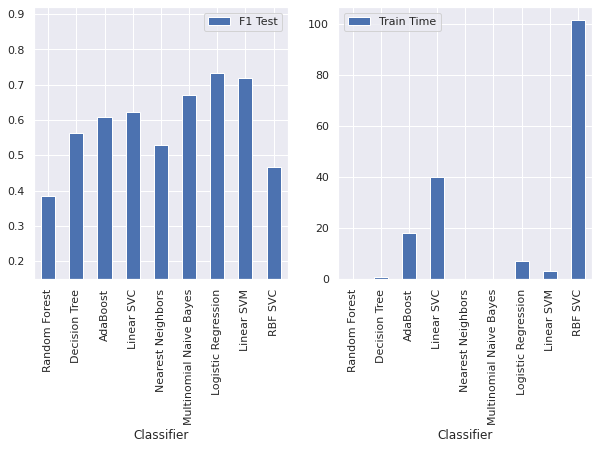

In [ ]:
# Viewing the results on a bar chart
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=True, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0],
             xlim=[0,1.1], ylim=[0.15,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])

##### The best perfoming models are: 

-Logistic Regression

-Linear SVC

### 10. Balancing Data

### Balancing Classes

#### Classes to up/down sample

Resampling is a process which involves changing the frequency of the observations. Below we apply it to assess whether or not it will improve our training. This process also serves as model tuning as we will be using a define resampling strategy while taking note of performance measure.

In [ ]:
data_copy = df_train.copy()

In [ ]:
# importing the module and creating a resampling variable
class_size = int(len(data_copy[data_copy['sentiment']==1])/2)

In [ ]:
# seperating the four classes
class_1 = data_copy[data_copy['sentiment']==-1]
class_2 = data_copy[data_copy['sentiment']==0]
class_3 = data_copy[data_copy['sentiment']==1]
class_4 = data_copy[data_copy['sentiment']==2]

#### Up-sampling and Down-sampling

Here we increase the frequency of the sample classes.

In [ ]:
# upsampling classes 1, 2, and 4 & downsampling class 3
class_1_up = resample(class_1,replace=True,n_samples=class_size, random_state=27)
class_2_up = resample(class_2,replace=True,n_samples=class_size, random_state=27)
class_4_up = resample(class_4,replace=True,n_samples=class_size, random_state=27)
class_3_down = resample(class_3,replace=False,n_samples=class_size, random_state=27)

In [ ]:
# Creating a new DataFrame from the balanced bata
balanced_df = pd.concat([class_1_up, class_2_up, class_4_up,class_3_down])

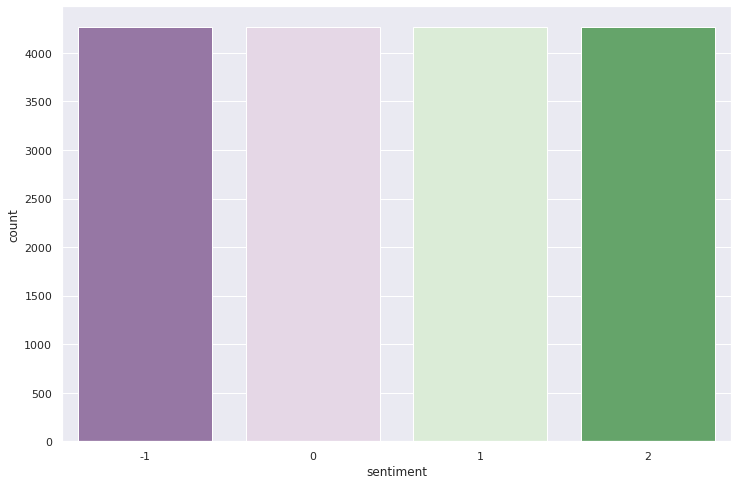

In [ ]:
# Checking if data has been balanced
sns.countplot(x = balanced_df['sentiment'], data = data, palette='PRGn')
plt.show()

The equal distribution of classes as shown on the count plot, confirms that classes are now balanced.



## Training with balanced data

In [ ]:
# Converting the collection of clean messages to a matrix of token counts
corpus = balanced_df['cleaned_msg']

vectorizer = CountVectorizer()
count_vectorized = vectorizer.fit_transform(corpus)

In [ ]:
# Converting the collection of clean messages to a matrix of TF-IDF features
data_copy = balanced_df['cleaned_msg']

vectorizer=TfidfVectorizer(lowercase=True,stop_words='english',max_features=30000,analyzer='word',ngram_range=(1,2))
vectorized = vectorizer.fit_transform(data_copy)

In [ ]:
# Defining the features and the label
X2 = balanced_df['message']
X_bal = scipy.sparse.hstack([vectorized, count_vectorized])
y_bal = balanced_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.25, random_state=42)

In [ ]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
names = ['Logistic Regression'
         , 'Nearest Neighbors'
         , 'Multinomial Naive Bayes'
         , 'Linear SVC'
         , 'RBF SVC'
         , 'Linear SVC_1'
         , 'Decision Tree'
         , 'Random Forest'
         ,  'AdaBoost'
]

In [ ]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
classifiers = [
    LogisticRegression(random_state = 5)
    , KNeighborsClassifier(3)
    , MultinomialNB()
    , SVC(kernel="linear", random_state = 5, C=0.025)
    , SVC(kernel="rbf", random_state = 5, gamma=2, C=1)
    , LinearSVC()
    , DecisionTreeClassifier(max_depth=6)
    , RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    , AdaBoostClassifier()
]

In [ ]:
# Training of models, scoring & appending to results list
results = []

# Creating dictionaries to store evaluation results
models = {}
confusion = {}
class_report = {}

# This will calculate the total training time of each model
for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

# This will show us the status of the training
    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

# This will show us the status of the scoring
    print ('... scoring')
    
# These are our evaluation measures
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')

    f1        = metrics.f1_score(y_train, y_pred, average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

# Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision,
                    recall, f1, f1_test, run_time.best])

# Creating a dataframe of the results to view easily
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy',
                                         'Precision', 'Recall', 'F1 Train',
                                         'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Multinomial Naive Bayes model...
... predicting
... scoring
Fitting Linear SVC model...
... predicting
... scoring
Fitting RBF SVC model...
... predicting
... scoring
Fitting Linear SVC_1 model...


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring


### 11. Model Performance with with balanced data

In [ ]:
# Viewing the results in a dataframe
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Linear SVC_1,0.999140,0.999141,0.999140,0.999140,0.879410,4.943508
Logistic Regression,0.990465,0.990474,0.990465,0.990458,0.868046,6.767380
RBF SVC,0.999453,0.999453,0.999453,0.999453,0.843096,66.486497
Multinomial Naive Bayes,0.898476,0.902116,0.898476,0.897852,0.812267,0.013083
Linear SVC,0.806252,0.810784,0.806252,0.805224,0.735381,50.084593
Nearest Neighbors,0.837046,0.874343,0.837046,0.836506,0.676935,0.002817
AdaBoost,0.601485,0.613541,0.601485,0.601470,0.599208,10.702742
Decision Tree,0.559672,0.563512,0.559672,0.555010,0.547025,0.516694
Random Forest,0.260023,0.721187,0.260023,0.119231,0.108581,0.044514


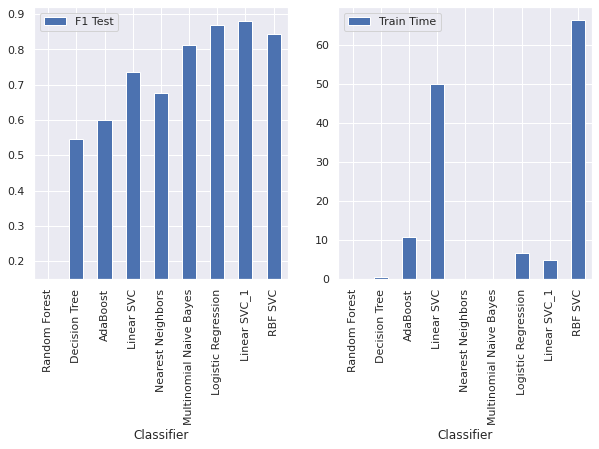

In [ ]:
# Viewing the results on a bar chart
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=True, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0],
             xlim=[0,1.1], ylim=[0.15,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])

##### Best perfoming models with improved perfomance post Hyper-Parameter Tuning

-Linear SVC

-Logistic Regression

### 12. Model Explanation/Evaluation

The following metrics are used to measure the perfomance of the models as accuracy is not always accurate when measuring data that is not balanced:

1. Confusion Matrix: table shows correct predictions and types of incorrect predictions.
2. Precision: the number of true positives divided by all positive predictions. 
3. Recall: the number of true positives divided by the number of positive values in the test data. 
4. F1: Score: the weighted average of precision and recall.

In [ ]:
# Extracting a confusion matrix from the results of balanced data

predictions = clf.predict(X_test)

In [ ]:
# Extracting a classification report from the balanced data

print(metrics.confusion_matrix(y_test, predictions))

[[516 366  81 113]
 [129 677 139 129]
 [ 60 192 607 177]
 [ 52 147 123 757]]


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.68      0.48      0.56      1076
           0       0.49      0.63      0.55      1074
           1       0.64      0.59      0.61      1036
           2       0.64      0.70      0.67      1079

    accuracy                           0.60      4265
   macro avg       0.61      0.60      0.60      4265
weighted avg       0.61      0.60      0.60      4265



### 13. Submission

In [ ]:
# create tfidf vector and fit
vect=TfidfVectorizer(lowercase=True,stop_words='english',max_features=30000,ngram_range=(1,1),min_df=1,max_df=0.9)#,analyzer='word',max_features=10,ngram_range=(1,2))
X_tf=vect.fit_transform(df_train['message'])

In [ ]:
# change to array
X=X_tf.toarray()

In [ ]:
# fit test data
X_tf_test=vect.transform(df_test['message'])

In [ ]:
#convert test data to array
X_tf_test=X_tf_test.toarray()

In [ ]:
# create labels
y=df_train['sentiment']

In [ ]:
#perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=27)

In [ ]:
#initiate linear svc model
lsv= LinearSVC()

In [ ]:
#fit model 
lsv.fit(X_train, y_train)

In [ ]:
#predict labels
y_pred_test = lsv.predict(X_tf_test)

In [ ]:
#generate csv file for submission
results = pd.DataFrame({"tweetid":df_test.index,"sentiment": y_pred_test})
results.to_csv("Team_6.csv", index=False)

### 14. Conclusion

- Most tweets are pro cimate change. This would mean that it is feasible for companies to sell eco-friendly products. It would be a good to analyse the tweets of anti climate change users to understand why they have those beliefs. Understading this can help companies to market eco-friendly products in a way that appeals to anti climate tweeters. For instance, it seems that Republicans are more likely to be anti climate change. One reason for this is that they believe that climate change measures hinder the economy by regulating the markets. Can marketing this product in way that shows that the eco-friendly market is a booming market and creates job , convice them to move towards these products?

- We notice that the tweets are a lot from the American perspective. What does this say about the rest of the World? Is the rest of the world pro or anti? Should companies also focus on tapping the growing markets of Africa and Asia? Poorer economies are quicker to adopt new technologies. For instance Africa adopted mobile cellphones on a large scale as they didnt have landline infrastructre. Can the market in Africa be the first to adapt to and take up quickly the eco-friendly products?

- The Neutral sentiment class can be an important market to educate and sell eco-friendly products to as they have not necessarily taken a stance against climate change being human made.

- The Anti Climate change sentiment class seem to be from those that are from the conservative side of the political sphere. Generally conservatives are aligned with conspiracy theory hence the reason for them not believing in human caused climate change. This market would be difficult to convince to adopt climate friendly products.

*   While model performance can be improved by better preprocessing techniques,  and tuning parameters for 'ideal' ones, this leaves room for continued improvement and better training of the models to make better predictions. The insights gained from analyzing the data can help relevant stakeholders understand sentiments behind tweets relating to climate change
*   Based on the results that were obtained, the best performing models were linear svc followed closely by logistic regression with F1 test score of 0.879410 and 0.868046 respectively. 




